ML рекомендательной системы

Файл с данными: [trips_data.xlsx]

In [ ]:
import pandas as pd

trips_data = pd.read_excel("trips_data.xlsx") 

In [ ]:
trips_data.head()

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000.0,Краснодар,25.0,Шоппинг,Автомобиль,1.0,New York
1,152000.0,Екатеринбург,60.0,Архитектура,Самолет,1.0,London
2,83000.0,Томск,49.0,Архитектура,Автомобиль,2.0,Sydney
3,161000.0,Краснодар,41.0,Шоппинг,Автомобиль,0.0,New York
4,146000.0,Краснодар,58.0,Архитектура,Самолет,1.0,Sydney


In [ ]:
trips_data.describe()

,salary,age,family_members
count,1000.000000,1000.000000,1000.000000
mean,111935.000000,55.209000,1.295000
std,54580.049073,11.925164,0.885867
min,0.000000,18.000000,0.000000
25%,68000.000000,50.000000,1.000000
50%,99000.000000,58.000000,1.000000
75%,161000.000000,63.000000,2.000000
max,250000.000000,82.000000,4.000000


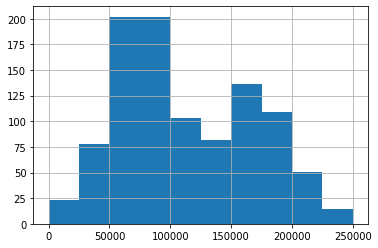

In [ ]:
trips_data.salary.hist()

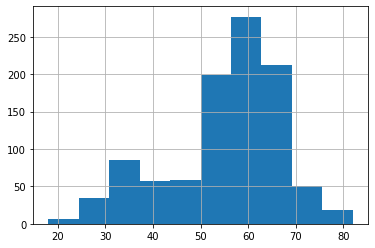

In [ ]:
trips_data.age.hist()

In [ ]:
trips_data.city.value_counts()

Краснодар       307
Томск           267
Хабаровск       107
Киев            106
Омск             84
Екатеринбург     67
Новосибирск      33
Минск            14
Петербург        13
Ярославль         1
Москва            1
Name: city, dtype: int64

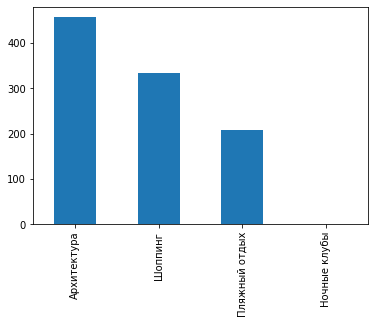

In [ ]:
trips_data.vacation_preference.value_counts().plot(kind="bar")

In [ ]:
trips_data.head()

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000.0,Краснодар,25.0,Шоппинг,Автомобиль,1.0,New York
1,152000.0,Екатеринбург,60.0,Архитектура,Самолет,1.0,London
2,83000.0,Томск,49.0,Архитектура,Автомобиль,2.0,Sydney
3,161000.0,Краснодар,41.0,Шоппинг,Автомобиль,0.0,New York
4,146000.0,Краснодар,58.0,Архитектура,Самолет,1.0,Sydney


In [ ]:
df = pd.get_dummies(trips_data, columns=["city", "vacation_preference", "transport_preference"])

In [ ]:
df.shape

(1000, 24)

In [ ]:
X = df.drop("target", axis=1)
y = df.target

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
model = LogisticRegression() # Настройки
model.fit(X,y)  # Обучение

score = model.score(X,y)
print("Score = ", score)
y_pred = model.predict(X) # Предсказания

pd.DataFrame(data = confusion_matrix(y, y_pred), columns=model.classes_, index=model.classes_)

Score =  0.241


,London,New York,Paris,Sydney,Tokio
London,1,64,42,59,33
New York,0,97,44,54,6
Paris,2,24,50,93,34
Sydney,0,60,51,53,34
Tokio,0,59,43,57,40


In [ ]:
model = RandomForestClassifier() # Настройки
model.fit(X,y)  # Обучение

score = model.score(X,y)
print("Score = ", score)
y_pred = model.predict(X) # Предсказания

pd.DataFrame(data = confusion_matrix(y, y_pred), columns=model.classes_, index=model.classes_)

Score =  0.999


,London,New York,Paris,Sydney,Tokio
London,198,0,0,1,0
New York,0,201,0,0,0
Paris,0,0,203,0,0
Sydney,0,0,0,198,0
Tokio,0,0,0,0,199


In [ ]:
model.classes_

array(['London', 'New York', 'Paris', 'Sydney', 'Tokio'], dtype=object)

In [ ]:
# Пример данных
{col:[0] for col in X.columns }

{'age': [0],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [0],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'family_members': [0],
 'salary': [0],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0]}

In [ ]:
example = {
 'age': [30],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [1],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'family_members': [0],
 'salary': [30000],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [1],
 'transport_preference_Самолет': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [1]
}
example_df = pd.DataFrame(data=example, columns=X.columns)

In [ ]:
model.predict(example_df)

array(['Paris'], dtype=object)

In [ ]:
model.predict_proba(example_df)

array([[0.01, 0.25, 0.74, 0.  , 0.  ]])

In [ ]:
model.classes_

array(['London', 'New York', 'Paris', 'Sydney', 'Tokio'], dtype=object)